# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Jeremy Kevin Panggabean
- **Email:** jeremypanggabean21@gmail.com
- **ID Dicoding:** jeremy_kevin_panggabean_aCyj

## Menentukan Pertanyaan Bisnis

1. Apa 5 kategori produk teratas berdasarkan jumlah penjualan?
2. Bagaimana rata-rata waktu pengiriman berdasarkan 5 wilayah pelanggan teratas?
3. Bagaimana persentase pesanan dibatalkan berdasarkan ke 4 metode pembayaran?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

#### Customers Dataset

In [2]:
customers_df = pd.read_csv("Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Geolocation dataset

In [3]:
geolocation_df = pd.read_csv("Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Orders Dataset

In [4]:
orders_df = pd.read_csv("Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_items_df = pd.read_csv("Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Products Dataset

In [8]:
products_df = pd.read_csv("Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
product_category_name_df = pd.read_csv("Dataset/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Sellers Dataset

In [10]:
sellers_df = pd.read_csv("Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
Dataset ini berisi 9 file CSV yang terkait dengan e-commerce. Berikut adalah penjelasan singkat tentang masing-masing file:
1. customers.csv: Berisi informasi tentang pelanggan, seperti ID pelanggan, nama, alamat, dan lain-lain.
2. orders.csv: Berisi informasi tentang pesanan, seperti ID pesanan, tanggal pesanan, total harga, dan lain-lain.
3. order_items.csv: Berisi informasi tentang item-item yang dipesan, seperti ID item, harga item, jumlah item, dan lain-lain.
4. products.csv: Berisi informasi tentang produk, seperti ID produk, nama produk, harga produk, dan lain-lain.
5. product_categories.csv: Berisi informasi tentang kategori produk, seperti ID kategori, nama kategori, dan lain-lain.
6. product_descriptions.csv: Berisi informasi tentang deskripsi produk, seperti ID produk, deskripsi produk, dan lain-lain.
7. sellers.csv: Berisi informasi tentang penjual, seperti ID penjual, nama penjual, alamat penjual, dan lain-lain.
8. reviews.csv: Berisi informasi tentang review produk, seperti ID review, ID produk, rating review, dan lain-lain.
9. geolocations.csv: Berisi informasi tentang lokasi geografis, seperti ID lokasi, nama lokasi, dan lain-lain.

### Assessing Data

#### Menilai data `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
1.  Semua kolom memiliki 99,441 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

#### Menilai data `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
1.  Semua kolom memiliki  1000163 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Terdapat  261831 duplikasi pada data

#### Menilai data `Orders Dataset`

##### `orders_df`

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
1.  Terdapat 3 kolom yang memiliki  nilai null, yang berarti ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

##### `order_items_df`

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
1.  Semua kolom memiliki  112650 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

##### `order_payments_df`

In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
1.  Semua kolom memiliki   103886 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

##### `order_reviews_df`

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
1.  Terdapat 2 kolom yang memiliki  nilai null, yang berarti ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

#### Menilai data `Products_df`

##### `products_df`

In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
1.  Hanya terdapat 1 kolom yang memiliki  nilai non-null, yang berarti terdapat nilai kosong (missing values) pada kolom lain di dataset ini
2.  Tidak terdapat duplikasi pada data

##### `product_category_name_df`

In [39]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [41]:
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
1.  Semua kolom memiliki 71 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

#### Menilai data `sellers_df`

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
1.  Semua kolom memiliki 3095 nilai non-null, yang berarti tidak ada nilai kosong (missing values) dalam dataset ini
2.  Tidak terdapat duplikasi pada data

### Cleaning Data

#### Membersihkan data duplikasi pada `geolocation_df`

In [47]:
geolocation_df.drop_duplicates(inplace=True)

In [48]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menggunakan metode `drop_duplicates()` untuk menghapus nilai duplikasi
- Tidak ada nilai duplikat pada `geolocation_df`

#### Menangani Missing Value pada `orders_dataset`

##### `orders_df`

In [49]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Dikarenakan ketiga kolom dengan missing value merupakan data waktu, maka metode yang digunakan adalah `ffill()` dimana diisi dengan nilai terakhir yang valid

In [50]:
orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

In [51]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### `order_review_df`

In [52]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight:**
- Mengisi missing value dengan string "No Title", dan juga "No Message" supaya lebih mudah dipahami bahwa ada data yang tidak tersedia

In [53]:
order_reviews_df["review_comment_title"].fillna(value="No Title", inplace=True)
order_reviews_df["review_comment_message"].fillna(value="No Message", inplace=True)

In [54]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Title,No Message,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Message,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Title,No Message,2018-07-01 00:00:00,2018-07-02 12:59:13


In [55]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### `products_df`

In [56]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Terdapat misssing value yang tidak terlalu banyak nilainya jika dibandingkan dengan keseluruhan dataset, maka kita akan drop missing value

In [57]:
products_df.dropna(inplace=True)

In [58]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Mengubah tipe data menjadi datetime pada `orders Dataset`

##### `orders_df`

In [59]:
dt_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in dt_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [60]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### `order_items_df`

#### Mengubah tipe data menjadi datetime pada kolom "shipping_limit_date"

In [61]:
dt_order_item = ["shipping_limit_date"]
for column in dt_order_item:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [62]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### `order_reviews_df`

In [63]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Mengubah tipe data menjadi datetime pada kolom "review_creation_date" dan "review_answer_timestamp"

In [64]:
dt_order_review = ["review_creation_date", "review_answer_timestamp"]
for column in dt_order_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [65]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### Explore data `customers_df`

In [66]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Terdapat 96096 customer unik, menunjukkan bahwa setiap pelanggan memiliki ID yang berbeda.
- Ada 4119 kota yang terdaftar, dan terdapat 27 negara bagian 

#### Menghitung dan mengurutkan jumlah pelanggan per kota

In [67]:
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False).reset_index()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


**Insight:**
- Sao Paulo merupakan kota yang memiliki pelanggan terbanyak
- Lagoao memiliki pelanngan paling sedikit

#### Menghitung dan mengurutkan jumlah pelanggan per negara bagian

In [68]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False).reset_index()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insight:**
- Pelanggan paling banyak berasal dari negara bagian SP yaitu 41746 pelanggan
- Pelanggan paling sedikit berasal dari negara bagian RR yaitu 46 pelanggan

### Explore data `orders_df`

In [69]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


- Menunjukkan rata-rata pengiriman untuk pesanan yang di approved sangat tinggi (428 hari)
- waktu pengiriman untuk pesanan yang berhasil dikirim adalah 12 hari

In [70]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

- Membuat kolom baru untuk memuat waktu pengiriman tiap order
- Menyimpannya sebagai `delivery_time`

In [71]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232,14.221327
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-552.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,693.000000


#### Menghitung rata-rata waktu pengiriman per status

In [72]:
average_delivery_time_by_status = orders_df.groupby('order_status').agg({
    'delivery_time': 'mean'
}).rename(columns={'delivery_time': 'average_delivery_time'}).reset_index()

In [73]:
average_delivery_time_by_status

,order_status,average_delivery_time
0,approved,428.500000
1,canceled,28.267200
2,created,101.400000
3,delivered,12.503949
4,invoiced,95.799363
5,processing,132.780731
6,shipped,42.140921
7,unavailable,118.387521


- Sekarang sudah terdapat kolom baru `average_delivery_time` yang menunjukkan waktu rata-rata dari pengiriman setiap order
- Terlihat rata-rata dari ketujuh `order_status` 

### Explore data `products_df`

In [74]:
products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_weight_g": "mean",
    "product_photos_qty": "mean"
}).sort_values(by="product_id",ascending=False).reset_index().nlargest(10, "product_id")

,product_category_name,product_id,product_weight_g,product_photos_qty
0,cama_mesa_banho,3029,2456.405084,1.392539
1,esporte_lazer,2867,2024.670736,2.135333
2,moveis_decoracao,2657,3008.266842,2.400828
3,beleza_saude,2444,1434.793781,1.624386
4,utilidades_domesticas,2335,3020.793576,2.212848
5,automotivo,1900,2654.650526,2.636842
6,informatica_acessorios,1639,898.377669,1.987797
7,brinquedos,1411,1869.356485,2.458540
8,relogios_presentes,1329,509.287434,2.234011
9,telefonia,1134,236.506173,2.759259


- Menunjukkan kategori produk, seperti cama_mesa_banho merupakan produk paling banyak dibeli pelanggan

### Explore data `sellers_df`

In [75]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [76]:
sellers_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id", ascending=False).reset_index()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


**Insight:**
- Sao Paulo memiliki jumlah penjual tertinggi dimana memiliki pasar yang luas
- Beberapa kota seperti Ivoti, Itirapina, Xaxim hanya memiliki 1 penjual terdaftar

In [77]:
sellers_df.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_city" : "unique"
}).sort_values(by="seller_id",ascending=False).reset_index()

,seller_state,seller_id,seller_city
0,SP,1849,"[campinas, mogi guacu, sao paulo, braganca pau..."
1,PR,349,"[curitiba, arapongas, sao jose dos pinhais, po..."
2,MG,244,"[belo horizonte, camanducaia, congonhal, aragu..."
3,SC,190,"[tubarao, imbituba, garopaba, sao ludgero, sao..."
4,RJ,171,"[rio de janeiro, saquarema, petropolis, itabor..."
5,RS,129,"[tres de maio, porto alegre, santo antonio da ..."
6,GO,40,"[anapolis, santa terezinha de goias, uruacu, g..."
7,DF,30,"[brasilia, brasilia df, gama]"
8,ES,23,"[viana, cachoeiro de itapemirim, cariacica / e..."
9,BA,19,"[lauro de freitas, porto seguro, salvador, bar..."


- SP merupakan negara bagian dengan seller terbanyak yaitu 1849 seller
- Negara bagian terendah yaitu AM, MA, dan PA, yang hanya memiliki 1 seller

### Explore data `orders_df` dan `customers_df`

In [78]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
61336,64a495213f59f3050ccd2ed250d88dde,0cc2ee1112a11a1094eff52fa2e87150,64006,teresina,PI,Active
72441,07ae746c23c06957d56ae4f0a3f7b3fe,2f3d09b69266cbab293052a3f0701f61,21221,rio de janeiro,RJ,Active
17766,61bc132b3af53618a5fdfa29cd72103c,fbc124426c03f4d4a5b051968f3050e9,22250,rio de janeiro,RJ,Active
48555,50577f33200de8b27ca46bf8ec17d82b,1e85ad2cf60fcd8b3668f0f9a403e846,90620,porto alegre,RS,Active
24983,1137d475838377849d917c784c1f21ad,9064c8531c29bfa15494e6b223ea851c,19210,tarabai,SP,Active


In [80]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

**Insight:**
- Seperti terlihat pada pivot table diatas, terdapat 99441 yang aktif. ini menunjukkan bahwa setiap pelanggan yang terdaftar telah melakukan setidaknya satu pembelian atau transaksi
- Tidak terdapat pelanggan Non Active

#### Menggabungkan data `orders_df` dan `customers_df`

In [81]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [82]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


**Insight:**
- Berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo merupakan kota dengan jumlah order terbanyak

In [83]:
on_time_deliveries = orders_customers_df[orders_customers_df['delivery_time'] <= (orders_customers_df['order_estimated_delivery_date'] - orders_customers_df['order_purchase_timestamp']).dt.days]
print(f"Jumlah Pengiriman Tepat Waktu: {on_time_deliveries.shape[0]}")

Jumlah Pengiriman Tepat Waktu: 89969


**Insight:**
- Berdasarkan hasil tersebut, jumlah pengiriman tepat waktu sebanyak 89969

### Explore data `order_items_df` dan `sellers_df`

In [84]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [85]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### Mengggabungkan data `order_items_df` dan `sellers_df`

In [86]:
sellers_items_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
sellers_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [87]:
sellers_items_df.groupby(by="seller_id").size().sort_values(ascending=False).reset_index(name="order_item_id")

,seller_id,order_item_id
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,5f57db27027655e6c6a391601daa0258,1
3091,5e25c632f9db6cfb8bc100421c2737b6,1
3092,5e106d93b717c2682b9383da480364a1,1
3093,d36b07fd3c5088e477a72d1fccfe29d4,1


**Insight:**
- Berdasarkan hasil tersebut top seller dengan jumlah order_item_id yang paling tinggi yaitu seller pertama dengan jumlah 2033

In [88]:
sellers_items_df.groupby(by="seller_id").agg({
    "price": "mean"
}).sort_values(by="price",ascending=False).reset_index()

,seller_id,price
0,80ceebb4ee9b31afb6c6a916a574a1e2,6729.000000
1,ee27a8f15b1dded4d213a468ba4eb391,6499.000000
2,585175ec331ea177fa47199e39a6170a,3549.000000
3,abe021b01ba992245271b9aa422032df,3360.000000
4,a00824eb9093d40e589b940ec45c4eb0,3133.323333
...,...,...
3090,1fa2d3def6adfa70e58c276bb64fe5bb,6.900000
3091,77128dec4bec4878c37ab7d6169d6f26,6.500000
3092,6c9875b2f94ba781186f0c1aed8d1687,6.250000
3093,3d62f86afa7c73be2628a3be1423f5a0,6.000000


**Insight:**
- Berdasarkan hasil tersebut terlihat bahwa rata-rata harga terbesar adalah dari seller ID pertama yaitu 6729.00 

### Explore data `products_df` dan `product_category_name_df`

In [89]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [90]:
product_category_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menggabungkan data `product_df` dan `product_category_name_df`

In [91]:
product_category_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

product_category_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [92]:
product_category_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head(5)

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_id, dtype: int64

**Insight:**
- Berdasarkan hasil tersebut terlihat bahwa bed_bath_table merupakah produk kategory jumlah terbanyak 

### Explore data `order_items_df` dan `product_category_df`

#### Menggabungkan data `order_items_df` dan `product_category_df`

In [93]:
order_product_df = pd.merge(
    left=order_items_df,
    right=product_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [94]:
order_product_df.groupby(by='product_category_name_english').agg({
    'price': 'mean',
    'freight_value': 'mean'
}).sort_values(by='price', ascending=False).reset_index().head(10)

,product_category_name_english,price,freight_value
0,computers,1098.340542,48.454680
1,small_appliances_home_oven_and_coffee,624.285658,36.156053
2,home_appliances_2,476.124958,44.538571
3,agro_industry_and_commerce,342.124858,27.564151
4,musical_instruments,281.616000,27.409544
5,small_appliances,280.778468,23.593888
6,fixed_telephony,225.693182,17.567462
7,construction_tools_safety,208.992371,20.201546
8,watches_gifts,201.135984,16.781160
9,air_conditioning,185.269226,22.724680


**Insight:**
- Berdasarkan hasil tersebut terlihat bahwa kategori produk computers memiiliki harga rata-rata tertinggi menunjukkan ini adalah produk premium
- Berdasarkan hasil tersebut terlihat bahwa kategori produk computers juga memiliki freight value (biaya pengiriman) yang tinggi hal ini menunjukkan variasi dari biaya pengiriman tergantung kategori produk 

### Explore data `customers_df` dan `geolocation_df`

#### Menggabungkan `customer_df` dan `geolocation_df`

In [95]:
customers_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
customers_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.515413,-47.398194,franca,SP


In [96]:
customers_geolocation_df.groupby(['customer_state']).agg({
    'customer_id': 'nunique',
    'customer_city': 'nunique'
}).sort_values(by='customer_id', ascending=False).reset_index()

,customer_state,customer_id,customer_city
0,SP,41746,629
1,RJ,12852,149
2,MG,11635,745
3,RS,5466,379
4,PR,5045,364
5,SC,3637,240
6,BA,3380,353
7,DF,2140,6
8,ES,2033,95
9,GO,2020,178


**Insight:**
- Hasil tersebut menunjukkan bahwa kota besar seperti Sao Paulo dan Rio de Janeiro memiliki lebih banyak pelanggan daripada kota-kota kecil

### Explore data `order_payments_df` dan `order_reviews_df`

#### Menggabungkan `order_payments_df` dan `order_reviews_df`

In [97]:
payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payments_reviews_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Message,2017-12-21,2017-12-22 01:10:39


### Explore data `order_items_df` dan `sellers_df`

#### Menggabungkan `order_payments_df` dan `sellers_df`

In [98]:
seller_item_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

seller_item_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [99]:
seller_item_df.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(5)

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
Name: price, dtype: float64

**Insight:**
- Hasil tersebut menunjukkan penjual dengan ID yang memiliki penjualan tertinggi sebesar 229472

#### Menggabungkan data `seller_item_df` dan `payments_reviews_df`

In [100]:
seller_item_reviews_df = pd.merge(
    left=seller_item_df,
    right=payments_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

seller_item_reviews_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No Title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No Title,No Message,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,No Title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,No Title,No Message,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,No Title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


### Explore data `products_df` dan `product_category_name_df`

In [101]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Menghilangkan beberapa kolom yang tidak akan digunakan di analisis selanjutnya

In [102]:
products_drop_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]
products_df.drop(products_drop_cols, axis=1, inplace=True)

#### Menggabungkan data `products_df` dan `product_category_name_df`

In [103]:
product_category_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

product_category_df.head(5)

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [104]:
product_category_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

**Insight:**
- Hasil tersebut menunjukkan kategori produk yang paling populer dan memiliki banyak pilihan produk adalah bed_bath_table, sport_leisure, dan furniture_decor

#### Menggabungkan data `product_category_df` dan `sellers_item_reviews_df`

In [105]:
seller_product_df = pd.merge(
    left=product_category_df,
    right=seller_item_reviews_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,...,1.0,debit_card,1.0,18.30,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,...,1.0,voucher,1.0,265.99,19866247db89845ef558ef19a6c26fcd,5.0,No Title,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,...,1.0,credit_card,1.0,87.62,32921b4e09c9a19d61fe46ce04231b84,5.0,No Title,No Message,2018-07-14,2018-07-16 16:20:04
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,...,1.0,credit_card,2.0,121.84,70949d129965fb1ee32aaccec720a19e,1.0,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07,2018-08-08 11:53:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,...,1.0,credit_card,4.0,46.19,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,No Title,No Message,2018-04-17,2018-04-18 04:29:47


In [106]:
seller_product_df.groupby(by='product_category_name_english').price.nunique().sort_values(ascending=False)

product_category_name_english
health_beauty                        1263
sports_leisure                       1139
housewares                           1110
computers_accessories                1003
bed_bath_table                        871
                                     ... 
furniture_mattress_and_upholstery       9
home_comfort_2                          5
fashion_childrens_clothes               4
security_and_services                   2
cds_dvds_musicals                       2
Name: price, Length: 71, dtype: int64

**Insight:**
- Hasil tersebut menunjukkan kategori produk yang memiliki harga unik terbanyak seperti health_beauty dan sport_leisure

### Explore data `all_df`

In [107]:
all_df = pd.merge(
    left=orders_customers_df,
    right=seller_product_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Message,2018-08-18,2018-08-22 19:07:58


In [108]:
product_count = all_df.groupby('product_category_name_english').product_id.count().reset_index()
product_count = product_count.sort_values(by='product_id', ascending=False)
product_count

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


**Insight:**
- Hasil tersebut menunjukkan jumlah produk terbanyak mulai dari yang tertinggi ke terendah
- bed_bath_table merupakan produk terbanyak dan security_and_services merupakan produk paling sedikit

In [109]:
sample_data = all_df.sample(frac=0.3)  # Mengambil 10% dari data
sample_data.to_csv('sample_data.csv')

In [110]:
all_df.to_csv("all_data.csv", index=False)

In [111]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Message,2018-08-18,2018-08-22 19:07:58


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa 5 kategori produk teratas berdasarkan jumlah penjualan?

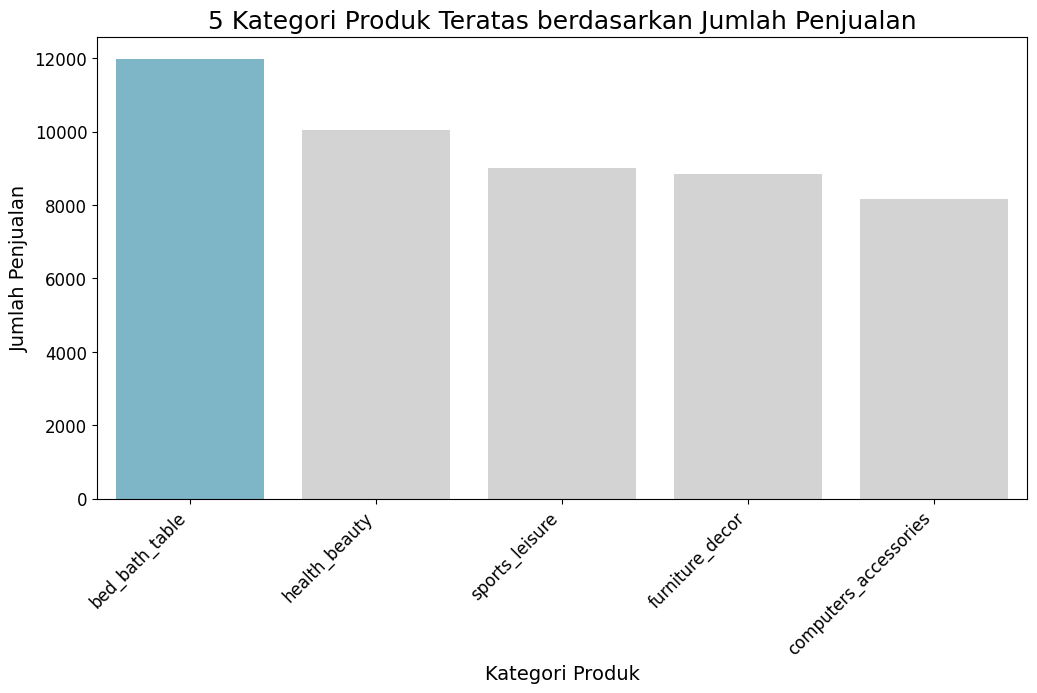

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_categories = all_df['product_category_name_english'].value_counts().nlargest(5)

sns.barplot(x=top_categories.index, y=top_categories.values, palette=colors, ax=ax)
ax.set_title("5 Kategori Produk Teratas berdasarkan Jumlah Penjualan", loc="center", fontsize=18)
ax.set_xlabel("Kategori Produk", fontsize=14)
ax.set_ylabel("Jumlah Penjualan", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45, ha='right')

plt.savefig('5 kategori produk teratas.png')
plt.show()

**Insight:**
- Dari hasil visuallisasi ini kita dapat melihat 5 kategori produk teratas berdasarkan jumlah penjualan yang menunjukkan kategori produk yang sangat populer di kalangan konsumer
- kategori lainseperti health_beauty, sport_leisure, furniture_decor, dan computer_accessories memiliki jumlah penjualan yang lebih rendah dibandingkan dengan bed_bath_table, ini menunjukkan adanya perbedaan yang signifikan dalam permintaan untuk produk di kategori ini

### Pertanyaan 2: Bagaimana rata-rata waktu pengiriman berdasarkan 5 wilayah pelanggan teratas?

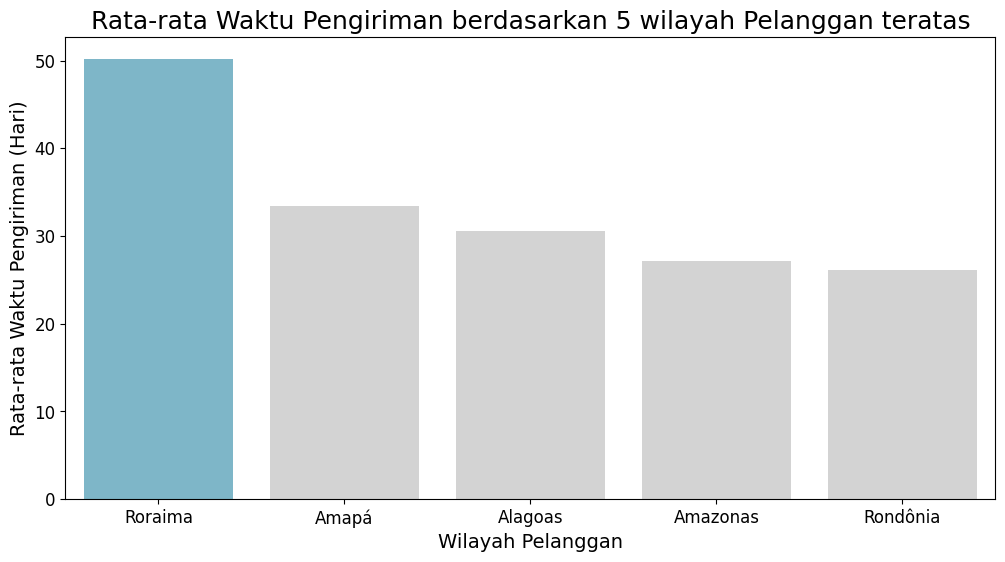

In [113]:
avg_delivery_time = all_df.groupby('customer_state')['delivery_time'].mean().nlargest(5)

wilayah_mapping = {
    'RR': 'Roraima',
    'AP': 'Amapá',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'RO': 'Rondônia'
}

avg_delivery_time.index = avg_delivery_time.index.map(wilayah_mapping)

fig, ax = plt.subplots(figsize=(12, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * 4
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette=colors, ax=ax)
ax.set_title("Rata-rata Waktu Pengiriman berdasarkan 5 wilayah Pelanggan teratas", fontsize=18)
ax.set_xlabel("Wilayah Pelanggan", fontsize=14)
ax.set_ylabel("Rata-rata Waktu Pengiriman (Hari)", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("rata-rata waktu pengiriman berdasarkan wilayah pelanggan teratas.png")
plt.show()

**Insight:**
- Dari hasil visualisasi tersebut terdapat perbedaan signifikan dalam waktu pengiriman antar wilayah, dimana wilayah Roraima memiliki waktu terlama sekitar 50 hari
- Wilayah Rondônia merupakan wilayah yang memiliki waktu pengiriman paling efisien atau tercepat sekitar 25 hari

### Pertanyaan 3: Bagaimana persentase pesanan dibatalkan berdasarkan ke 4 metode pembayaran?

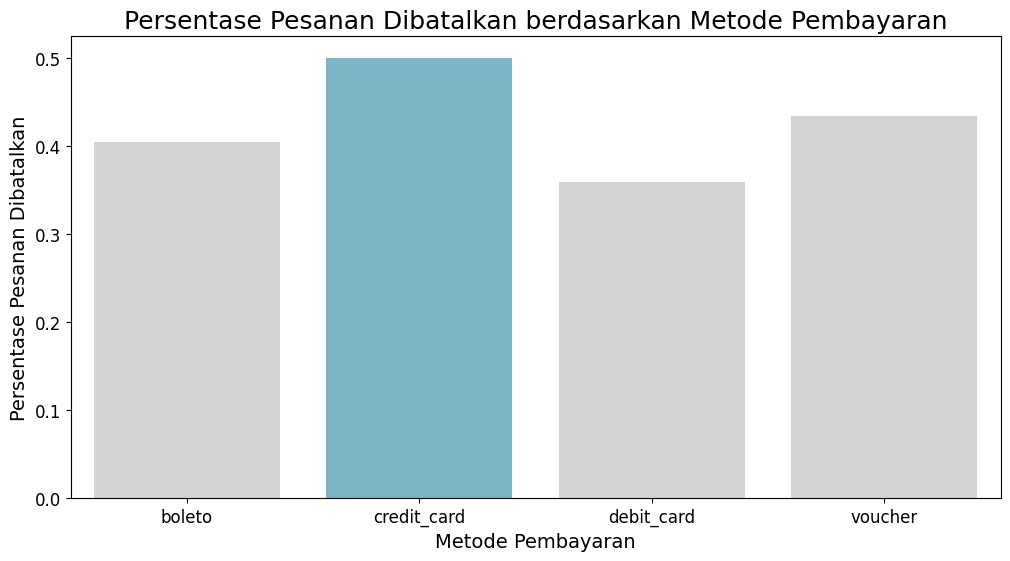

In [114]:
cancellation_rate = all_df[all_df['order_status'] == 'canceled'].groupby('payment_type').size() / all_df.groupby('payment_type').size() * 100

fig, ax = plt.subplots(figsize=(12, 6))
colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"] * (len(cancellation_rate) - 1)
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette=colors, ax=ax)
ax.set_title("Persentase Pesanan Dibatalkan berdasarkan Metode Pembayaran", fontsize=18)
ax.set_xlabel("Metode Pembayaran", fontsize=14)
ax.set_ylabel("Persentase Pesanan Dibatalkan", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("Persentase pesanan dibatalkan berdasarkan metode pembayaran.png")
plt.show()

**Insight:**
- Dari hasil visualisasi tersebut, metode pembayaran kartu_kredit memiliki persentase pembatalan tertinggi
- Dari empat metode pembayaran tersebut, metode pembayaran yang memiliki tingkat pembatalan yang lebih rendah yaitu debit_card

## Analisis Lanjutan RFM ANALYSIS

- Analisis RFM (Recency, Frequency, Monetary) adalah teknik pemasaran yang digunakan untuk memahami perilaku pelanggan dengan mengukur seberapa baru mereka melakukan pembelian (Recency), seberapa sering mereka bertransaksi (Frequency), dan total pengeluaran mereka (Monetary). Tujuan dari analisis ini adalah untuk melakukan segmentasi pelanggan, memungkinkan perusahaan untuk mengelompokkan mereka berdasarkan perilaku, sehingga dapat merancang kampanye pemasaran yang lebih efektif dan meningkatkan retensi pelanggan.

In [115]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Message,2018-08-18,2018-08-22 19:07:58


In [116]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  
    "order_id": "nunique",
    "payment_value": "sum"  
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


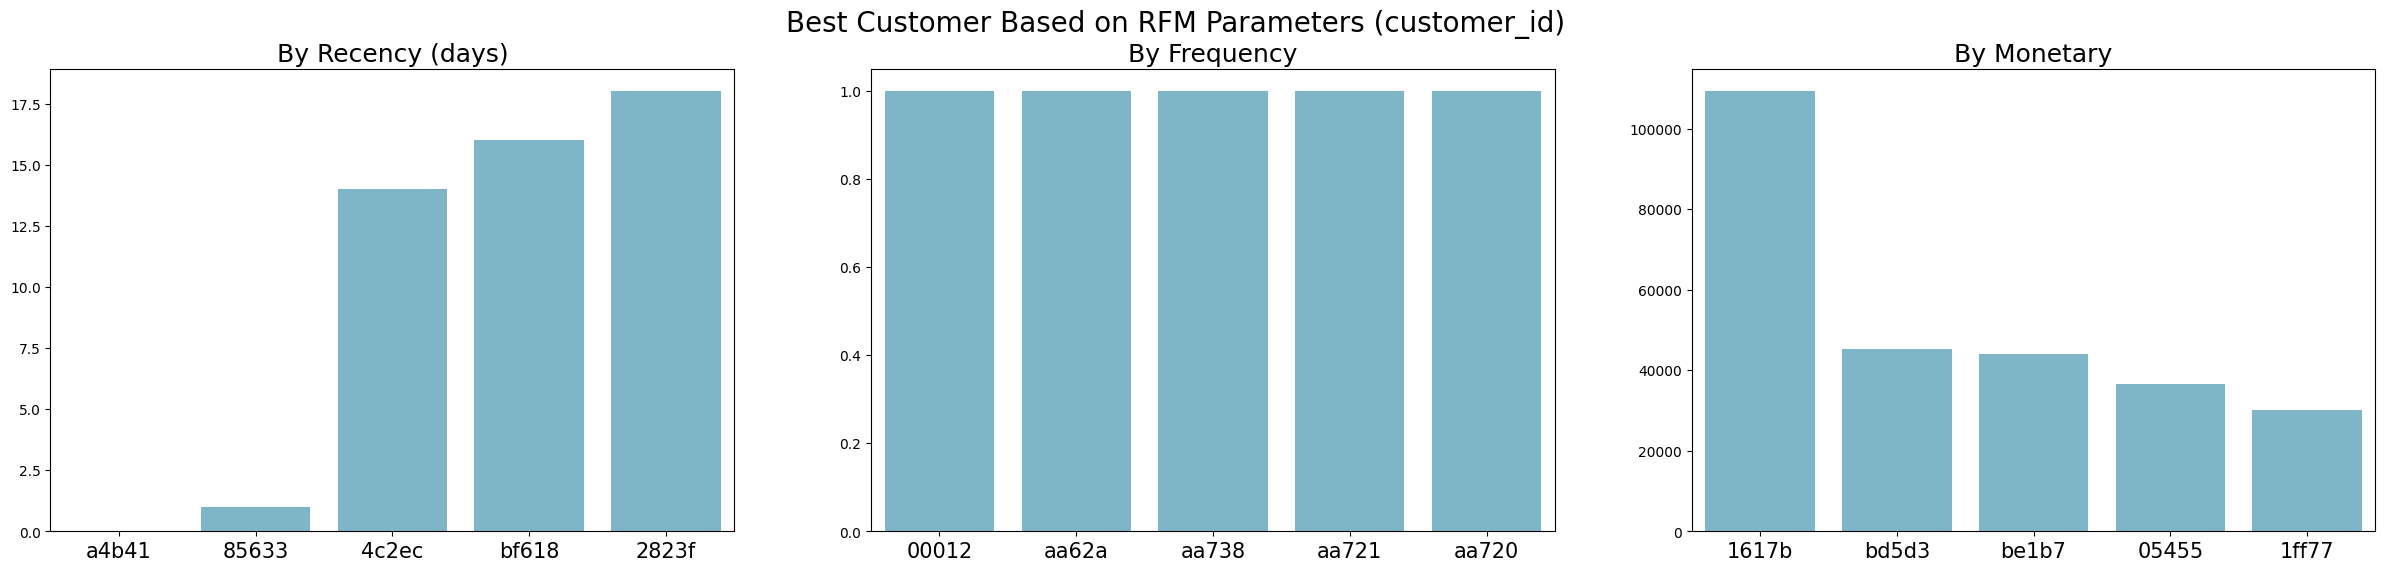

In [117]:
rfm_df['customer_id'] = rfm_df['customer_id'].apply(lambda x: x[:5])
     
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.savefig("Best Customer Based on RFM parameters (customer_id).png")
plt.show()

**Insight:**
- Recency
  * Pelanggan dengan ID a4b41 menunjukkan nilali recency yang rendah, berarti baru melakukan pembelian.
- Frequency
  * Hasil visualisasi tersebut menampilkan kelima pelanggan dengan frekuensi pembelian tertinggi, atau sering bertransaksi
- Monetary
  * Pelanggan dengan ID 1617b memiliki nilai tertinggi, yang menunjukkan bahwa pelanggan tersebut, memberikan kontribusi signifikan terhadap pendapatan

## Conclusion

- **Conclution pertanyaan 1: Apa 5 kategori produk teratas berdasarkan jumlah penjualan?**
  * Dominasi kategori bed_bath_table menunjukkan adanya potensi pasar yang kuat. strategi pemasaran butuh diimplementasikan suapaya memaksimalkan potensi penjualan dari kategori ini.
  * Dengan menganalisis faktor-faktor yang mempengaruhi penjualan kategori lain dapat membantu meningkatkan penjualan dan pengembangan produk.
    
- **Conclution pertanyaan 2: Bagaimana rata-rata waktu pengiriman berdasarkan 5 wilayah pelanggan teratas?**
  * Waktu pengiriman yang lama di wilayah RR bisa menjadi faktor yang mempengaruhi kepuasan pelanggan. memperbaiki efisiensi pengiriman di wilayah ini dapat meningkatkan pengalaman pelanggan.
  * Perlu mempertimbangkan memberikan informasi yang jelas kepada pelanggan mengenai estimasi waktu pengiriman, dan meningkatkan infrastruktur logistik di wilayah dengan waktu pengiriman yang lebih lama.

- **Conclution pertanyaan 3: ### Pertanyaan 3: Bagaimana persentase pesanan dibatalkan berdasarkan ke 4 metode pembayaran?**
  * Dengan metode pembayaran credit card memiliki pembatalan tertinggi, mencapai hampir 50%, dapat dilakukan peningkatan layanan pelanggan untuk membantu pengguna credit card yang mungkin mengalami kesulitan saat melakukan transaksi.
  * Mempromosikan metode pembayaran yang memiliki tingkat pembatalan lebih rendah untuk meningkatkan konversi pembelian.